# Exploratory Data Analysis.

## Understanding the Dataset
### 1. Dataset Description

The dataset contains information about customers from a bank and is designed to help predict customer churn, which occurs when customers close their accounts and stop doing business with the bank. This dataset was collected to analyze patterns in customer behavior and to identify factors that contribute to churn.

### 2. Problem Definition.

The goal of this analysis is to predict whether a customer will churn (i.e., close their account) based on various factors such as their credit score, account balance, and tenure with the bank. This will help the bank take preventive actions to retain at-risk customers.

### 3. Target Variable

The target variable is churn, a binary variable where 1 indicates that the customer has churned and 0 indicates they are still an active customer. The task is to predict whether a customer will churn based on the other features.

## Loading the data

In [5]:
import pandas as pd

data_path = "../data/raw/bank_customer_churn_prediction.csv"
# Load the dataset
df = pd.read_csv(data_path)
# Display the first few rows of the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# shape of the dataset
df.shape

(10000, 12)

In [8]:
# data types of the dataset
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [9]:
# check for missing data
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [12]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')
Categorical features: Index(['country', 'gender'], dtype='object')


**Basic summary statistics for numerical columns**

In [13]:
df[numerical_features].describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Preview Categorical Variables**

In [14]:
df[categorical_features].describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


## Data Quality Checks

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

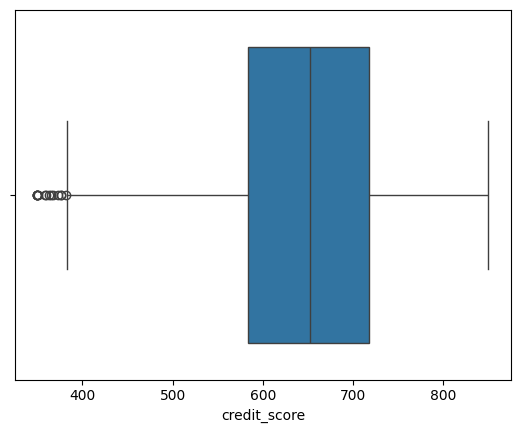

In [22]:
# Box plot for detecting outliers in the credit_score column
sns.boxplot(x=df['credit_score'])
plt.show()

In [25]:
df.where(df['credit_score'] < 850).sum()

TypeError: can only concatenate str (not "int") to str